## Create new data using neural style transfer


In [87]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import shutil

import os

In [88]:
cache_dir = os.path.join(os.path.expanduser("~"), ".tfhub_modules")
if os.path.exists(cache_dir):
    shutil.rmtree(cache_dir)

model = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')

In [89]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [90]:
style_image = load_image(r'generated_images\epoch_6000.png')

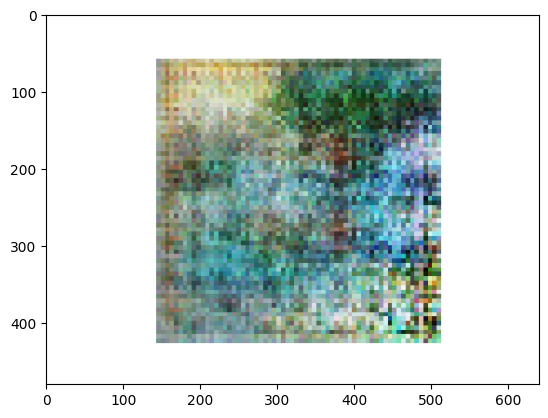

In [91]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [92]:
content =load_image(r'13.jpg')

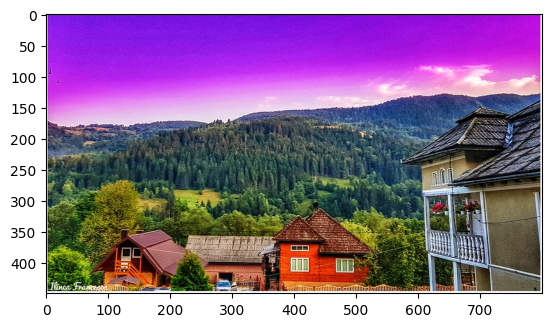

In [93]:
plt.imshow(np.squeeze(content))
plt.show()

In [94]:
stylized_image = model(tf.constant(content), tf.constant(style_image))[0]


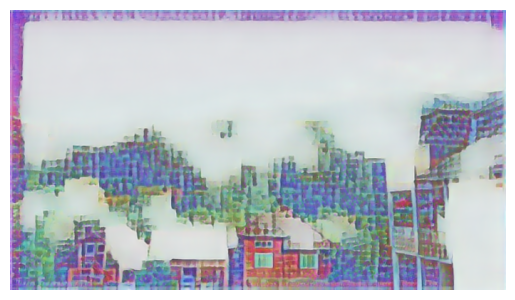

In [95]:
plt.imshow(np.squeeze(stylized_image))
plt.axis('off') 


plt.show()

In [26]:
# newpath=r'Data\Natural pic stylized'

In [27]:
# for file in os.listdir(r'Data\Natural pic'):
#     content_image = load_image(os.path.join(r'Data\Natural pic',file))
#     stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
#     save_path = os.path.join(newpath, file)
#     cv2.imwrite(save_path, cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))
